<a href="https://www.kaggle.com/code/mustafacihadgoktepe/spaceship-titanic-deep-learning?scriptVersionId=108264937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


HomePlanet: The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.

Cabin: The cabin number where the passenger is staying.

Destination: The planet the passenger will be debarking to.

Age: The age of the passenger.

VIP: Whether the passenger has paid for special VIP service during the voyage.

RoomService: Amount the passenger has billed for room service.

FoodCourt: Amount the passenger has billed at the food court.

ShoppingMall: Amount the passenger has billed at the shopping mall.

Spa: Amount the passenger has billed at the spa.

VRDeck: Amount the passenger has billed at the VR deck.

Name: The name of the passenger.

Transported: Whether the passenger was transported to another dimension.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [4]:
data.columns[data.isnull().any()]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [5]:
data[data.columns[data.isnull().any()]].isnull()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data[data.columns[data.isnull().any()]].isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [7]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
dtype: float64

In [8]:
data.loc[data['Transported'] == True, 'Transported'].count() / data['Transported'].count()

0.5036236051995858

It seems our data is balanced.

In [9]:
print(data.PassengerId.nunique())
print(data.Name.nunique())

8693
8473


In [10]:
data.Name.fillna(value='No_name', inplace=True)

I believe family has a role in survival, so let's make a column for surnames:

In [11]:
data['Surname'] = [name.split()[-1] for name in data['Name']]

I will drop name and id column.

In [12]:
data.drop(labels=['PassengerId', 'Name'], axis=1, inplace = True)

Also people who was in Cryosleep couldn't spend any money, because of that i will fill their null values with zero.

In [13]:
m = data.loc[data['CryoSleep'] == True, ['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]
m.fillna(value=0, inplace=True)
data.update(m)

Total Spending could be important, in order to calculate it, i will fill null values of columns which I will use.

In [14]:
data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(data[['RoomService', 'FoodCourt',
                                                                                 'ShoppingMall', 'Spa',
                                                                                 'VRDeck']].median(), inplace=True)

data['Total Spending'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

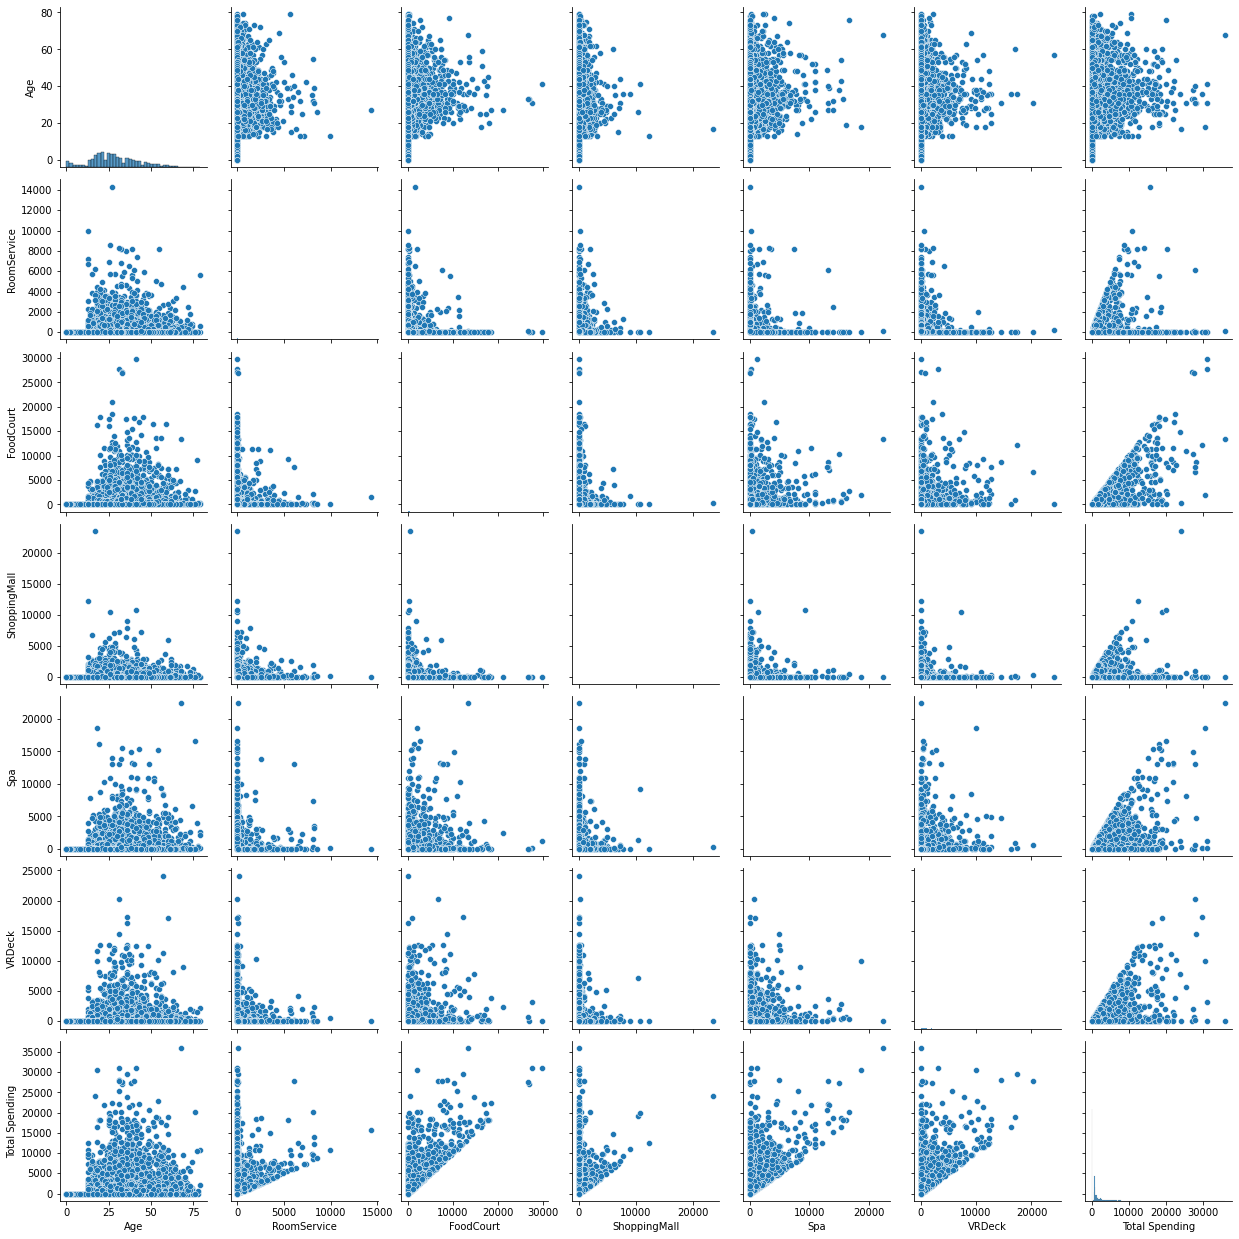

In [15]:
sns.pairplot(data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total Spending']]);

Let's check outliers.

In [16]:
def outlier_checker(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr*1.5
    up = q3 + iqr*1.5
    
    data.loc[data[col_name] < low, col_name] = low
    data.loc[data[col_name] > up, col_name] = up
    
    if data.loc[(data[col_name] < low) | (data[col_name] > up)].any(axis=None):
        print(f'There is outliers in column named {col_name}')
    else:
        print(f"There isn't any outliers in column named {col_name}")

In [17]:
for col_name in data.select_dtypes(exclude=['object', 'bool']).columns:
    outlier_checker(data, col_name)

There isn't any outliers in column named Age
There isn't any outliers in column named RoomService
There isn't any outliers in column named FoodCourt
There isn't any outliers in column named ShoppingMall
There isn't any outliers in column named Spa
There isn't any outliers in column named VRDeck
There isn't any outliers in column named Total Spending


OK then. Moving on.

In [18]:
X = data.drop('Transported', axis=1)
y = pd.DataFrame(data['Transported'])

In [19]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

features_num = X.select_dtypes(['float64', 'int64']).columns
features_cat = X.select_dtypes(['object']).columns

transformer_num = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
transformer_cat = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

preprocessor = make_column_transformer((transformer_num, features_num),
                                       (transformer_cat, features_cat))

X_preprocessed = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_LE = label_encoder.fit_transform(y)
y_LE = pd.DataFrame(y_LE, columns=y.columns)

Check for relationships between features and target values.

In [21]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_preprocessed, y_LE), columns=['MI Scores'], index=X.columns)
corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y_LE['Transported']), columns=['Correlation'])
s_corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y_LE['Transported'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = corr.join([mi, s_corr])
relation.sort_values(by='Correlation', ascending=False)

,Correlation,MI Scores,Spearman_Correlation
ShoppingMall,0.460132,0.109429,0.460132
FoodCourt,0.115461,0.023310,0.135782
Total Spending,0.014725,0.030837,0.015016
Surname,-0.037261,0.000000,-0.037261
Spa,-0.052972,0.029031,-0.055254
HomePlanet,-0.074248,0.022351,-0.069422
VRDeck,-0.108152,0.010645,-0.103728
Cabin,-0.121726,0.040818,-0.201846
Destination,-0.187102,0.063418,-0.243854
VIP,-0.315489,0.055161,-0.341519


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y_LE, train_size=0.8, test_size=0.2, stratify = y_LE)

In [23]:
X_train_prepared = pd.DataFrame(preprocessor.fit_transform(X_train), columns=X_train.columns)
X_valid_prepared = pd.DataFrame(preprocessor.transform(X_valid), columns=X_valid.columns)

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks, metrics, optimizers, losses

model = Sequential([
    layers.BatchNormalization(input_shape=[13]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy(),
                       metrics.AUC(),
                       metrics.Precision(),
                       metrics.Recall()])

early_stopping = callbacks.EarlyStopping(patience=15, min_delta=0.001, restore_best_weights=True)

lr_rop = callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience=10, factor=0.2, verbose=1, min_lr=5e-10)

2022-10-16 15:21:08.301833: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [26]:
history = model.fit(X_train_prepared, y_train,
                    validation_data=(X_valid_prepared, y_valid),
                    epochs=1000,
                    callbacks=[early_stopping, lr_rop])

Epoch 1/1000


2022-10-16 15:21:08.623532: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


218/218 [==============================] - 6s 19ms/step - loss: 0.6855 - binary_accuracy: 0.6967 - auc: 0.7567 - precision: 0.7046 - recall: 0.6850 - val_loss: 0.5252 - val_binary_accuracy: 0.7458 - val_auc: 0.8257 - val_precision: 0.7270 - val_recall: 0.7934
Epoch 2/1000
218/218 [==============================] - 3s 16ms/step - loss: 0.5634 - binary_accuracy: 0.7229 - auc: 0.7955 - precision: 0.7285 - recall: 0.7170 - val_loss: 0.5161 - val_binary_accuracy: 0.7619 - val_auc: 0.8237 - val_precision: 0.7631 - val_recall: 0.7648
Epoch 3/1000
218/218 [==============================] - 3s 16ms/step - loss: 0.5311 - binary_accuracy: 0.7443 - auc: 0.8128 - precision: 0.7535 - recall: 0.7316 - val_loss: 0.5288 - val_binary_accuracy: 0.7648 - val_auc: 0.8220 - val_precision: 0.7650 - val_recall: 0.7694
Epoch 4/1000
218/218 [==============================] - 3s 16ms/step - loss: 0.5085 - binary_accuracy: 0.7558 - auc: 0.8253 - precision: 0.7673 - recall: 0.7393 - val_loss: 0.5477 - val_binary_a

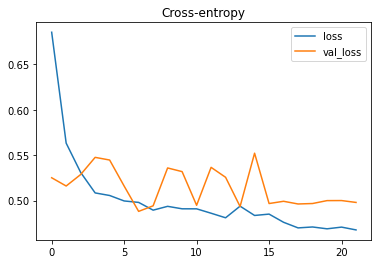

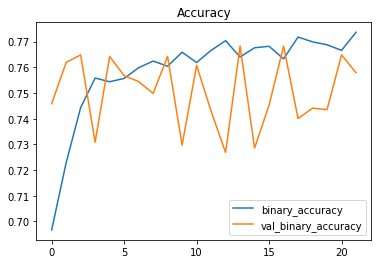

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy");
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy");

In [28]:
model.evaluate(X_valid_prepared, y_valid)

55/55 [==============================] - 0s 6ms/step - loss: 0.4882 - binary_accuracy: 0.7545 - auc: 0.8390 - precision: 0.7422 - recall: 0.7854


[0.48819220066070557,
 0.7544565796852112,
 0.8389716148376465,
 0.7421790957450867,
 0.7853881120681763]

In [29]:
y_pred = model.predict(X_valid_prepared)

In [30]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred),
    recall_score(y_valid, y_pred),
    f1_score(y_valid, y_pred)))

Precision score is: 0.742179 
Recall score is: 0.785388 
f1 score is: 0.763172


In [32]:
from sklearn.metrics import classification_report

report = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True, target_names=[0, 1]))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.768473,0.742179,0.754457,0.755326,0.755228
recall,0.723059,0.785388,0.754457,0.754224,0.754457
f1-score,0.745075,0.763172,0.754457,0.754124,0.754191
support,863.000000,876.000000,0.754457,1739.000000,1739.000000


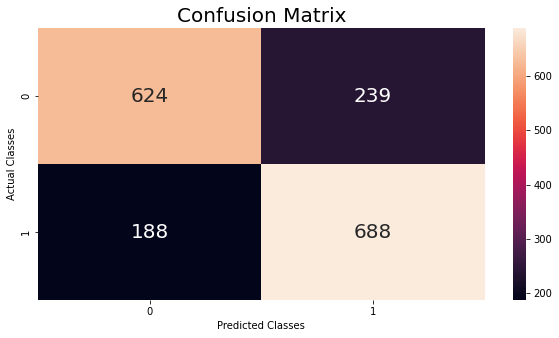

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=[0, 1], index=[0, 1])

plt.figure(figsize = (10,5));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":20});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

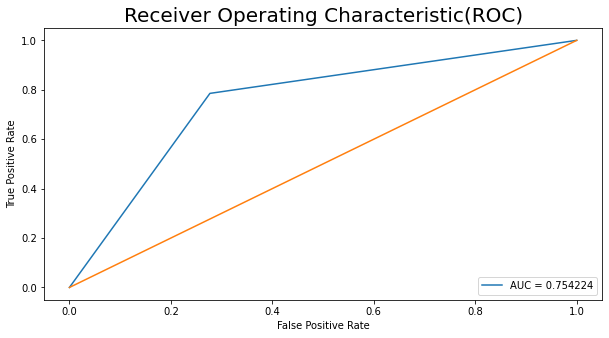

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, y_pred)
auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,5));
plt.plot(false_positive_rate, true_positive_rate, label="AUC = {:2f}".format(auc));
plt.plot([0,1], [0,1]);
plt.legend(loc='lower right');
plt.title("Receiver Operating Characteristic(ROC)", fontsize=20);
plt.ylabel("True Positive Rate");
plt.xlabel("False Positive Rate");

In [35]:
data_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
data_test_copy = data_test.copy(deep=True)

In [36]:
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [37]:
data_test_copy.Name.fillna(value='No_name', inplace=True)
data_test_copy['Surname'] = [name.split()[-1] for name in data_test_copy['Name']]
data_test_copy.drop(labels=['PassengerId', 'Name'], axis=1, inplace = True)
m = data_test_copy.loc[data['CryoSleep'] == True, ['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]
m.fillna(value=0, inplace=True)
data_test_copy.update(m)
data_test_copy[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(data_test_copy[['RoomService',
                                                                                                     'FoodCourt',
                                                                                                     'ShoppingMall',
                                                                                                     'Spa',
                                                                                                     'VRDeck']].median(),
                                                                                     inplace=True)

data_test_copy['Total Spending'] = data_test_copy['RoomService'] + data_test_copy['FoodCourt'] + data_test_copy['ShoppingMall'] + data_test_copy['Spa'] + data_test_copy['VRDeck']

In [38]:
data_test_prepared = pd.DataFrame(preprocessor.fit_transform(data_test_copy), columns=data_test_copy.columns)

In [39]:
pred_data_test_prepared = model.predict(data_test_prepared)
pred_data_test_prepared[pred_data_test_prepared <= 0.5] = 0 # False
pred_data_test_prepared[pred_data_test_prepared > 0.5] = 1 # True
pred_data_test_prepared

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

Thanks for reading.